In [1]:
#importing all the libraries needed for the code
import numpy as np #Array for processing strings, numbers, records and objects
import pandas as pd #High-performance, easy-to-use data structures and data analysis tools
import matplotlib.pyplot as plt #Publication quality figures in Python
import seaborn as sns #Statistical data visualization
import tensorflow as tf #Machine Learning library
from keras.preprocessing.image import ImageDataGenerator #for image preprocessing and documentation
from keras.callbacks import EarlyStopping,ReduceLROnPlateau #to perform instructions at various stages of the code
from keras.models import Sequential #for building machine learning models
from keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization #building block of models
from sklearn.metrics import confusion_matrix #used to measure the classification performance
from sklearn.model_selection import train_test_split #feature extraction (probably)
from sklearn.utils import shuffle #to obtain random samples
import os #provides a portable way of using operating system dependent functionality such as paths and I/O operations
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' #allows the user to access environment variables and operations
import warnings #used to ignore potential warnings
warnings.filterwarnings('ignore')
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [2]:
df = pd.read_csv("C:/Users/ROQEEB/Downloads/Documents/Class/Class 2/Coding/age_gender.csv")
df = shuffle(df)
df.head()

,age,ethnicity,gender,img_name,pixels
21168,64,3,0,20170113182054044.jpg.chip.jpg,122 132 140 142 144 146 150 154 156 157 157 15...
3688,21,1,0,20170115231442487.jpg.chip.jpg,106 86 93 106 114 115 120 129 140 148 151 155 ...
3197,20,1,1,20170116215855605.jpg.chip.jpg,49 29 36 21 20 19 27 41 43 52 58 58 63 68 77 8...
16909,45,0,0,20170117183552230.jpg.chip.jpg,31 43 54 80 105 122 119 121 131 144 149 154 15...
20210,58,0,0,20170117191918155.jpg.chip.jpg,52 79 105 118 130 154 152 153 162 172 178 174 ...


In [3]:
df.tail()

,age,ethnicity,gender,img_name,pixels
2057,16,0,1,20170119155149354.jpg.chip.jpg,90 74 63 87 37 24 86 121 153 183 188 188 197 1...
6303,26,2,1,20170105163951372.jpg.chip.jpg,23 21 20 23 43 69 98 123 143 160 172 177 177 1...
11133,30,0,0,20170117142922282.jpg.chip.jpg,21 27 41 54 70 95 122 145 160 168 170 179 181 ...
8128,26,3,0,20170119183458846.jpg.chip.jpg,253 253 253 253 253 252 251 248 209 171 194 18...
15085,39,3,1,20170117141047098.jpg.chip.jpg,19 21 24 33 47 57 61 65 76 79 84 89 93 97 101 ...


In [4]:
df

,age,ethnicity,gender,img_name,pixels
21168,64,3,0,20170113182054044.jpg.chip.jpg,122 132 140 142 144 146 150 154 156 157 157 15...
3688,21,1,0,20170115231442487.jpg.chip.jpg,106 86 93 106 114 115 120 129 140 148 151 155 ...
3197,20,1,1,20170116215855605.jpg.chip.jpg,49 29 36 21 20 19 27 41 43 52 58 58 63 68 77 8...
16909,45,0,0,20170117183552230.jpg.chip.jpg,31 43 54 80 105 122 119 121 131 144 149 154 15...
20210,58,0,0,20170117191918155.jpg.chip.jpg,52 79 105 118 130 154 152 153 162 172 178 174 ...
...,...,...,...,...,...
2057,16,0,1,20170119155149354.jpg.chip.jpg,90 74 63 87 37 24 86 121 153 183 188 188 197 1...
6303,26,2,1,20170105163951372.jpg.chip.jpg,23 21 20 23 43 69 98 123 143 160 172 177 177 1...
11133,30,0,0,20170117142922282.jpg.chip.jpg,21 27 41 54 70 95 122 145 160 168 170 179 181 ...
8128,26,3,0,20170119183458846.jpg.chip.jpg,253 253 253 253 253 252 251 248 209 171 194 18...


In [5]:
df.shape

(23705, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23705 entries, 21168 to 15085
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [7]:
df.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


In [8]:
num_pixels = len(df['pixels'][0].split(" "))
img_height = int(np.sqrt(len(df['pixels'][0].split(" "))))
img_width = int(np.sqrt(len(df['pixels'][0].split(" "))))
print(num_pixels, img_height, img_width)

2304 48 48


In [9]:
df['pixels'] = df['pixels'].apply(lambda x: np.array(x.split(),dtype='float32'))

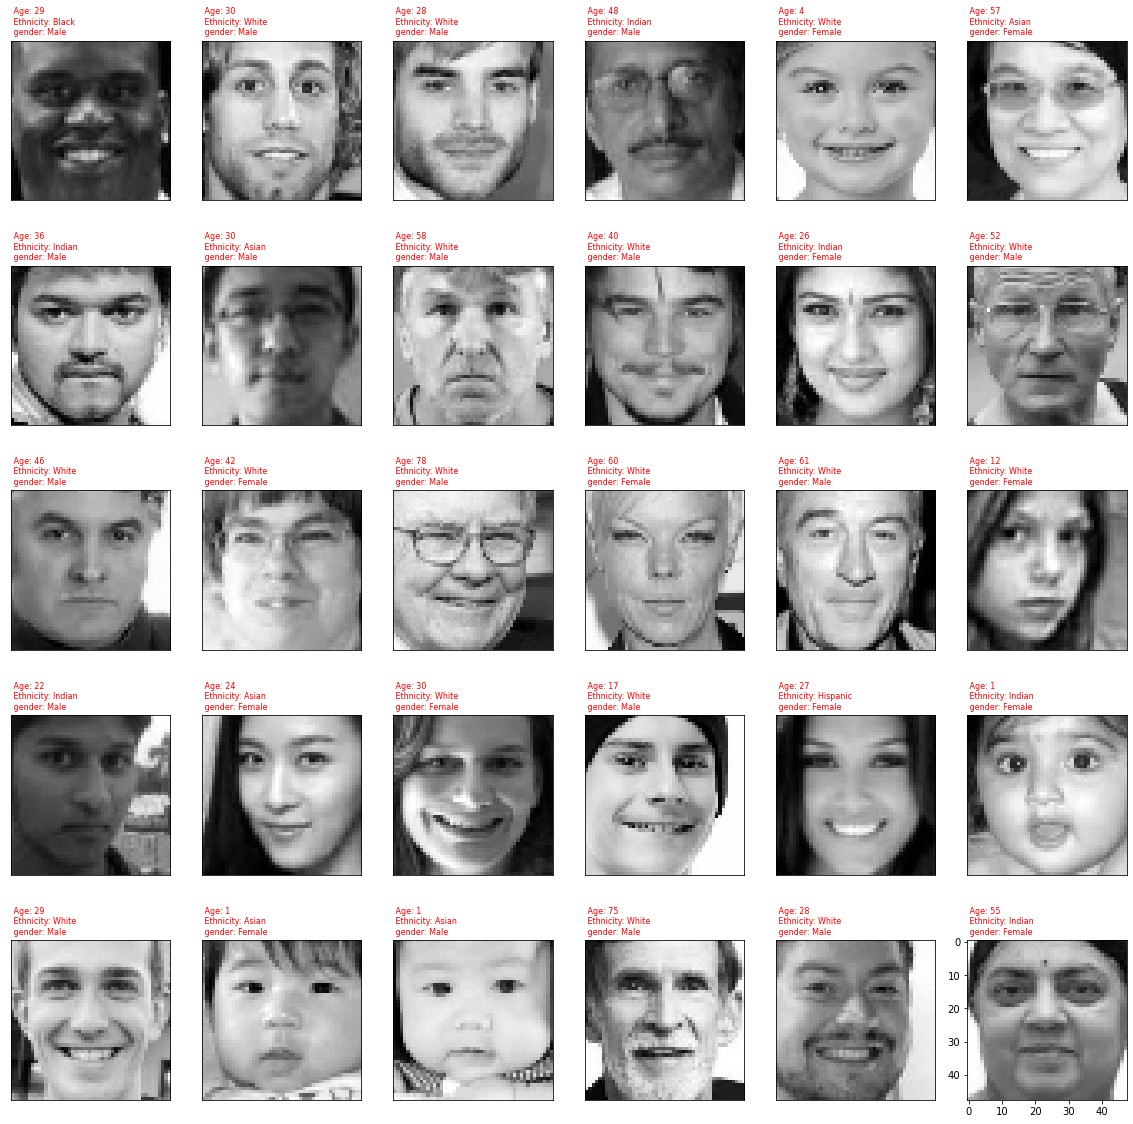

In [10]:
plt.figure(figsize=(20, 20))

for i in range(30):  
    index = np.random.randint(0, len(df))
    plt.xticks([])
    plt.yticks([])   
    plt.grid(False)
    plt.subplot(5, 6, i+1)
    plt.imshow(df['pixels'].iloc[index].reshape(48, 48),"gray")
    plt.title(' Age: {}\n Ethnicity: {}\n gender: {}'.format(df['age'].iloc[index], {0:"White", 1:"Black", 2:"Asian", 3:"Indian", 4:"Hispanic"}[df['ethnicity'].iloc[index]], {0:"Male", 1:"Female"}[df['gender'].iloc[index]]),loc="left",color='red',fontsize = 8)

plt.show()

In [11]:
X = np.array(df['pixels'].tolist())
X = np.reshape(X, (-1, 48, 48,1))
y = df['age']
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X, y, test_size=0.3, random_state=44)

In [12]:
train_datagen=ImageDataGenerator(rescale=1/255)
train_generator_age=train_datagen.flow(
    X_train_age ,y_train_age ,batch_size=32 
)

test_datagen=ImageDataGenerator(rescale=1/255)
test_generator_age=test_datagen.flow(
    X_test_age ,y_test_age ,batch_size=32 
)

In [13]:
X_train_age.shape

(16593, 48, 48, 1)

In [14]:
y_train_age.shape

(16593,)

In [15]:
X_test_age.shape

(7112, 48, 48, 1)

In [16]:
y_test_age.shape

(7112,)

In [17]:
X_train_age[:4]

array([[[[ 75.],
         [ 81.],
         [ 94.],
         ...,
         [113.],
         [ 95.],
         [ 77.]],

        [[ 75.],
         [ 87.],
         [101.],
         ...,
         [121.],
         [101.],
         [ 87.]],

        [[ 79.],
         [ 92.],
         [108.],
         ...,
         [127.],
         [111.],
         [ 99.]],

        ...,

        [[154.],
         [146.],
         [135.],
         ...,
         [140.],
         [141.],
         [141.]],

        [[163.],
         [155.],
         [137.],
         ...,
         [146.],
         [143.],
         [138.]],

        [[169.],
         [158.],
         [137.],
         ...,
         [151.],
         [149.],
         [139.]]],


       [[[ 61.],
         [ 90.],
         [ 87.],
         ...,
         [ 41.],
         [ 21.],
         [ 29.]],

        [[ 75.],
         [ 92.],
         [105.],
         ...,
         [ 44.],
         [ 29.],
         [ 22.]],

        [[ 78.],
         [ 90.],
      

In [18]:
y_train_age[:7]

8003     26
17870     5
543       1
16607    43
15931    40
15676    40
20275    59
Name: age, dtype: int64

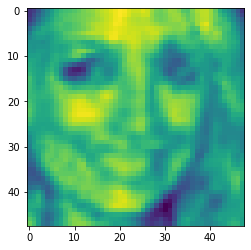

In [19]:
plt.imshow(X_train_age[0])

In [42]:
earlystop=EarlyStopping(patience=6)
learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_accuracy',
    patience= 3,
    verbose=1,
)
callbacks = [earlystop, learning_rate_reduction]

In [62]:
model_age = Sequential()

#CNN MODEL
# model_age.add(Conv2D(32,(3,3),activation='relu',input_shape=(48,48,1)))
# model_age.add(MaxPooling2D(2,2))


# model_age.add(Conv2D(64,(3,3),activation='relu'))
# model_age.add(MaxPooling2D(2,2))


# model_age.add(Conv2D(64,(3,3),activation='relu'))
# model_age.add(MaxPooling2D(2,2))
# model_age.add(Dropout(0.2))

# model_age.add(Conv2D(128,(3,3),activation='relu'))
# model_age.add(MaxPooling2D(2,2))
# model_age.add(Dropout(0.2))          
          
# model_age.add(Flatten())
# model_age.add(Dropout(0.5))            

# model_age.add(Dense(1,activation='relu'))

# model_age.compile(optimizer='adam' ,loss='mean_squared_error',metrics=['mae'])

# model_age.summary()

#ANN MODEL
model_age.add(Flatten(input_shape=(48,48,1)))
model_age.add(Dense(128,activation='relu'))
model_age.add(Dense(46,activation='relu'))
model_age.add(Dense(5,activation='sigmoid'))

model_age.compile(optimizer='SGD' ,loss='mean_squared_error',metrics=['mae'])

model_age.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               295040    
_________________________________________________________________
dense_23 (Dense)             (None, 46)                5934      
_________________________________________________________________
dense_24 (Dense)             (None, 5)                 235       
Total params: 301,209
Trainable params: 301,209
Non-trainable params: 0
_________________________________________________________________


In [63]:
model_age.fit(
    train_generator_age, 
    epochs= 10,
    validation_data= test_generator_age,
    callbacks= callbacks
)

Epoch 1/10
519/519 [==============================] - 5s 10ms/step - loss: 1432.7827 - mae: 32.2376 - val_loss: 1452.9039 - val_mae: 32.4512
Epoch 2/10
519/519 [==============================] - 2s 4ms/step - loss: 1432.7205 - mae: 32.2365 - val_loss: 1452.9034 - val_mae: 32.4512
Epoch 3/10
519/519 [==============================] - 2s 4ms/step - loss: 1432.7207 - mae: 32.2365 - val_loss: 1452.9033 - val_mae: 32.4512
Epoch 4/10
519/519 [==============================] - 2s 4ms/step - loss: 1432.7192 - mae: 32.2365 - val_loss: 1452.9031 - val_mae: 32.4512
Epoch 5/10
519/519 [==============================] - 2s 4ms/step - loss: 1432.7192 - mae: 32.2365 - val_loss: 1452.9033 - val_mae: 32.4512
Epoch 6/10
519/519 [==============================] - 2s 4ms/step - loss: 1432.7194 - mae: 32.2365 - val_loss: 1452.9031 - val_mae: 32.4512
Epoch 7/10
519/519 [==============================] - 2s 5ms/step - loss: 1432.7174 - mae: 32.2365 - val_loss: 1452.9031 - val_mae: 32.4512
Epoch 8/10
519/519 

<AxesSubplot:title={'center':'Age'}>

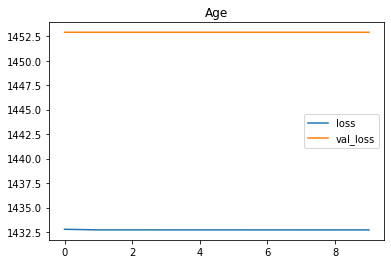

In [64]:
losses_age = pd.DataFrame(model_age.history.history)
losses_age[['loss','val_loss']].plot(title='Age')

In [65]:
model_age.evaluate(X_test_age, y_test_age)

223/223 [==============================] - 1s 4ms/step - loss: 1452.9031 - mae: 32.4512


[1452.903076171875, 32.451210021972656]

In [26]:
y = df['ethnicity']
X_train_ethnicity, X_test_ethnicity, y_train_ethnicity, y_test_ethnicity = train_test_split(X, y, test_size=0.3, random_state=44)

In [27]:
train_generator_ethnicity =train_datagen.flow(
    X_train_ethnicity ,y_train_ethnicity ,batch_size=64
)

test_generator_ethnicity =test_datagen.flow(
    X_test_ethnicity ,y_test_ethnicity ,batch_size=64
)

In [28]:
X_train_ethnicity.shape

(16593, 48, 48, 1)

In [29]:
X_test_ethnicity.shape

(7112, 48, 48, 1)

In [58]:
model_ethnicity = Sequential()

#CNN MODEL
# model_ethnicity.add(Conv2D(16,(3,3), padding='same',activation='relu',input_shape=(48,48,1)))
# model_ethnicity.add(MaxPooling2D(2,2))

# model_ethnicity.add(Conv2D(32,(3,3), padding='same',activation='relu'))
# model_ethnicity.add(MaxPooling2D(2,2))

# model_ethnicity.add(Conv2D(64,(3,3), padding='same',activation='relu'))
# model_ethnicity.add(MaxPooling2D(2,2))


# model_ethnicity.add(Flatten())
# model_ethnicity.add(Dense(128,activation='relu'))


# model_ethnicity.add(Dense(5,activation='softmax'))

# model_ethnicity.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# model_ethnicity.summary()

#ANN MODEL
model_ethnicity.add(Flatten(input_shape=(48,48,1)))
model_ethnicity.add(Dense(128,activation='relu'))
model_ethnicity.add(Dense(46,activation='relu'))
model_ethnicity.add(Dense(5,activation='sigmoid'))

model_ethnicity.compile(optimizer='SGD' ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_ethnicity.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               295040    
_________________________________________________________________
dense_20 (Dense)             (None, 46)                5934      
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 235       
Total params: 301,209
Trainable params: 301,209
Non-trainable params: 0
_________________________________________________________________


In [59]:
model_ethnicity.fit(
    train_generator_ethnicity, 
    epochs= 15,
    validation_data= test_generator_ethnicity,
    callbacks= callbacks
)

Epoch 1/15
260/260 [==============================] - 3s 11ms/step - loss: 1.3885 - accuracy: 0.4298 - val_loss: 1.3109 - val_accuracy: 0.4639
Epoch 2/15
260/260 [==============================] - 2s 7ms/step - loss: 1.2608 - accuracy: 0.4992 - val_loss: 1.1797 - val_accuracy: 0.5229
Epoch 3/15
260/260 [==============================] - 2s 6ms/step - loss: 1.1718 - accuracy: 0.5573 - val_loss: 1.2547 - val_accuracy: 0.4968
Epoch 4/15
260/260 [==============================] - 2s 6ms/step - loss: 1.1097 - accuracy: 0.5870 - val_loss: 1.1786 - val_accuracy: 0.5838
Epoch 5/15
260/260 [==============================] - 2s 6ms/step - loss: 1.0774 - accuracy: 0.6066 - val_loss: 0.9924 - val_accuracy: 0.6422
Epoch 6/15
260/260 [==============================] - 2s 6ms/step - loss: 1.0287 - accuracy: 0.6243 - val_loss: 0.9759 - val_accuracy: 0.6391
Epoch 7/15
260/260 [==============================] - 2s 6ms/step - loss: 1.0078 - accuracy: 0.6339 - val_loss: 0.9523 - val_accuracy: 0.6647
Epoch

<AxesSubplot:title={'center':'Ethnicity'}>

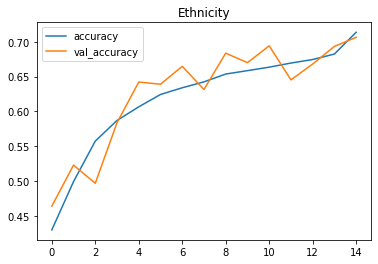

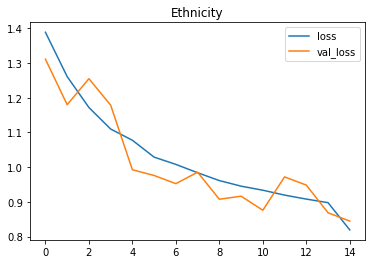

In [60]:
losses_ethnicity = pd.DataFrame(model_ethnicity.history.history)
losses_ethnicity[['accuracy','val_accuracy']].plot(title='Ethnicity')
losses_ethnicity[['loss','val_loss']].plot(title='Ethnicity')

In [61]:
model_ethnicity.evaluate(X_test_ethnicity, y_test_ethnicity)

223/223 [==============================] - 1s 2ms/step - loss: 1.5887 - accuracy: 0.4588


[1.5887125730514526, 0.4588020145893097]

In [34]:
y = df['gender']
X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(X, y, test_size=0.3, random_state=44)

In [35]:
train_generator_gender =train_datagen.flow(
    X_train_gender ,y_train_gender ,batch_size=32
)

test_generator_gender =test_datagen.flow(
    X_test_gender ,y_test_gender ,batch_size=32
)

In [36]:
X_train_gender.shape

(16593, 48, 48, 1)

In [37]:
X_test_gender.shape

(7112, 48, 48, 1)

In [54]:
model_gender = Sequential()

#CNN MODEL
# model_gender.add(Conv2D(32,(3,3),activation='relu',input_shape=(48,48,1)))
# model_gender.add(MaxPooling2D(2,2))

# model_gender.add(Conv2D(64,(3,3),activation='relu'))
# model_gender.add(MaxPooling2D(2,2))

# model_gender.add(Conv2D(64,(3,3),activation='relu'))
# model_gender.add(MaxPooling2D(2,2))

# model_gender.add(Flatten())
# model_gender.add(Dense(1,activation='sigmoid'))

# model_gender.compile(optimizer='SGD' ,loss='BinaryCrossentropy',metrics=['accuracy'])

# model_gender.summary()

#ANN MODEL
model_gender.add(Flatten(input_shape=(48,48,1)))
model_gender.add(Dense(128,activation='relu'))
model_gender.add(Dense(46,activation='relu'))
model_gender.add(Dense(5,activation='sigmoid'))

model_gender.compile(optimizer='SGD' ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_gender.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               295040    
_________________________________________________________________
dense_17 (Dense)             (None, 46)                5934      
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 235       
Total params: 301,209
Trainable params: 301,209
Non-trainable params: 0
_________________________________________________________________


In [55]:
model_gender.fit(
    train_generator_gender, 
    epochs= 20,
    validation_data= test_generator_gender,
    callbacks= callbacks
)

Epoch 1/20
519/519 [==============================] - 2s 4ms/step - loss: 0.6859 - accuracy: 0.5331 - val_loss: 0.6385 - val_accuracy: 0.6777
Epoch 2/20
519/519 [==============================] - 2s 4ms/step - loss: 0.5793 - accuracy: 0.7016 - val_loss: 0.6163 - val_accuracy: 0.6450
Epoch 3/20
519/519 [==============================] - 2s 4ms/step - loss: 0.5074 - accuracy: 0.7516 - val_loss: 0.4820 - val_accuracy: 0.7690
Epoch 4/20
519/519 [==============================] - 2s 4ms/step - loss: 0.4668 - accuracy: 0.7770 - val_loss: 0.4071 - val_accuracy: 0.8085
Epoch 5/20
519/519 [==============================] - 2s 5ms/step - loss: 0.4366 - accuracy: 0.7900 - val_loss: 0.3908 - val_accuracy: 0.8199
Epoch 6/20
519/519 [==============================] - 2s 4ms/step - loss: 0.4159 - accuracy: 0.8015 - val_loss: 0.4063 - val_accuracy: 0.8009
Epoch 7/20
519/519 [==============================] - 2s 4ms/step - loss: 0.4009 - accuracy: 0.8104 - val_loss: 0.3699 - val_accuracy: 0.8278
Epoch 

<AxesSubplot:title={'center':'Gender'}>

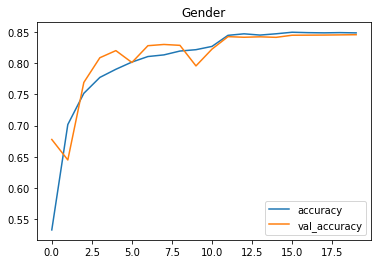

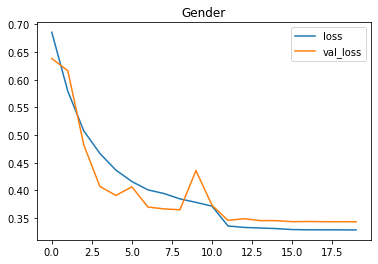

In [56]:
losses_gender = pd.DataFrame(model_gender.history.history)
losses_gender[['accuracy','val_accuracy']].plot(title='Gender')
losses_gender[['loss','val_loss']].plot(title='Gender')

In [57]:
model_gender.evaluate(X_test_gender, y_test_gender)

223/223 [==============================] - 1s 2ms/step - loss: 1.4602 - accuracy: 0.8273


[1.4601938724517822, 0.8273341059684753]